# Versuch 253 - Absorption rad. Strahlung

## Absorption von Betastrahlung

In [88]:
# Importieren der Module
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

In [89]:
# Importieren der Daten
tortime, thickness, counts =np.loadtxt('/Users/Peter/Desktop/Python-Kurs/253Tab1.txt', skiprows=1, usecols=(0,1,2), unpack=True)

In [90]:
# Berechnen von n-n_0ß
n_0ß=0.41
dn_0ß=0.04
crate= counts/tortime - n_0ß 

# Berechnen der Fehler (statistische Fehlerverteilung vorausgesetzt)
dcrate= np.sqrt((np.sqrt(counts)/tortime)**2+(dn_0ß)**2)

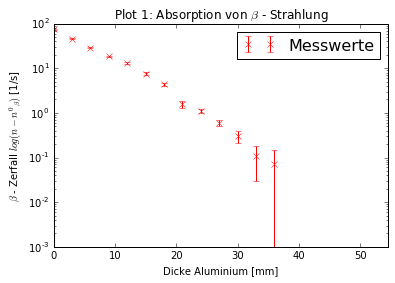

In [91]:
# Plotten der Daten in Lin-Log Diagramm
plt.yscale('log')
plt.xlabel('Dicke Aluminium [mm]')
plt.ylabel('$\\beta$ - Zerfall $ log(n - {{n^0}_\\beta}) $ [1/s]')
plt.title('Plot 1: Absorption von $\\beta$ - Strahlung')
plt.ylim(10**-3, 10**2)
plt.xlim(0, max(thickness)*140)

plt.errorbar(thickness*100, crate, yerr=dcrate, fmt='rx', label=r'Messwerte')
plt.legend(loc='best',prop={'size':16})
plt.savefig('253Plot1.png', dpi=300)

## Absorption von Gammastrahlung

In [50]:
# Importieren der Daten
tortime, thickness, counts =np.loadtxt('/Users/Peter/Desktop/Python-Kurs/253Tab2.txt', skiprows=1, usecols=(0,1,2), unpack=True)

In [51]:
# Berechnen von n-n_0
n_0=0.37
dn_0=0.04
crate= counts/tortime - n_0 

# Berechnen der Fehler (statistische Fehlerverteilung vorausgesetzt)
dcrate= np.sqrt((np.sqrt(counts)/tortime)**2+(dn_0)**2)

In [57]:
# Definition der Ausgleichsgerade y=f(x)
def linear(x, A, B): 
    return A*x + B


popt, pcov = curve_fit(linear, thickness, np.log(crate))
perr = np.sqrt(np.diag(pcov))
print(popt)
print (perr)

[-0.58529198  4.2325876 ]
[ 0.00777937  0.0230117 ]


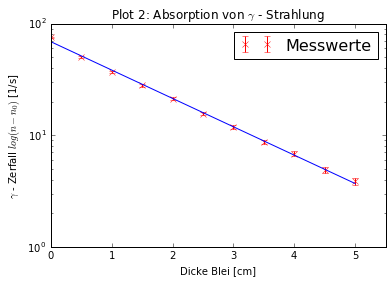

In [58]:
# Plotten der Daten in Lin-Log Diagramm
plt.yscale('log')
plt.xlabel('Dicke Blei [cm]')
plt.ylabel('$\\gamma$ - Zerfall $ log(n - {{n_0}}) $ [1/s]')
plt.title('Plot 2: Absorption von $\\gamma$ - Strahlung')
plt.ylim(1, 10**2)
plt.xlim(0, max(thickness)*1.1)

plt.errorbar(thickness, crate, yerr=dcrate, fmt='rx', label=r'Messwerte')
plt.legend(loc='best',prop={'size':16})
plt.plot(thickness, np.exp(linear(thickness, *popt)), label='$m_{fit}=%.2f \pm%.2f, (t_{fit}=%.2f \pm%.3f)$' %(popt[0], perr[0], popt[1], perr[1]))
plt.savefig('253Plot2.png', dpi=300)

## Absorption von Alpha-Strahlung

In [93]:
# Importieren der Daten
tortime, pressure, counts =np.loadtxt('/Users/Peter/Desktop/Python-Kurs/253Tab3.txt', skiprows=1, usecols=(0,1,2), unpack=True)

In [94]:
# Berechnung der Fehler
crate=counts/tortime
dpressure=2
dcrate= np.sqrt(counts)/tortime
print (pressure)
print()

[  21.  121.  228.  320.  437.  385.  412.  347.  358.  374.]



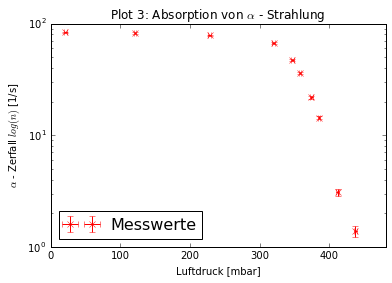

In [95]:
# Plotten der Daten in Lin-Log Diagramm
plt.yscale('log')
plt.xlabel('Luftdruck [mbar]')
plt.ylabel('$\\alpha$ - Zerfall $ log(n) $ [1/s]')
plt.title('Plot 3: Absorption von $\\alpha$ - Strahlung')
plt.ylim(1, 10**2)
plt.xlim(0, max(pressure)*1.1)
plt.errorbar(pressure, crate, yerr=dcrate, xerr=dpressure, fmt='rx', label=r'Messwerte')
plt.legend(loc='best',prop={'size':16})
plt.savefig('253Plot3.png', dpi=300)

In [96]:
lpressure=pressure[4:10]
lcrate=crate[4:10]
popt, pcov = curve_fit(linear, lpressure, np.log(lcrate))
perr = np.sqrt(np.diag(pcov))
print(popt)
print (perr)

[ -0.04142636  18.40946523]
[ 0.00255485  0.98805269]


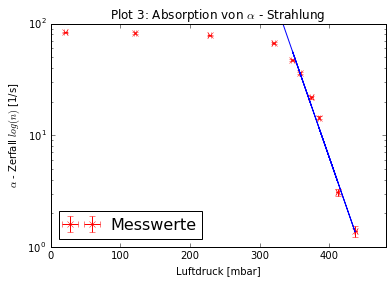

In [97]:
# Plotten der Daten in Lin-Log Diagramm
plt.yscale('log')
plt.xlabel('Luftdruck [mbar]')
plt.ylabel('$\\alpha$ - Zerfall $ log(n) $ [1/s]')
plt.title('Plot 3: Absorption von $\\alpha$ - Strahlung')
plt.ylim(1, 10**2)
plt.xlim(0, max(pressure)*1.1)
plt.errorbar(pressure, crate, yerr=dcrate, xerr=dpressure, fmt='rx', label=r'Messwerte')
plt.plot(pressure, np.exp(linear(pressure, *popt)))
plt.legend(loc='best',prop={'size':16})
plt.savefig('253Plot3.png', dpi=300)

In [ ]:
pressure[4]+